In [8]:
import pandas as pd 
import numpy as np
observations = pd.read_csv('observations.csv')
observations_subset = observations.head(50)
observations_subset.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv('species_info.csv')
species_subset = species.head(50)
species_subset.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


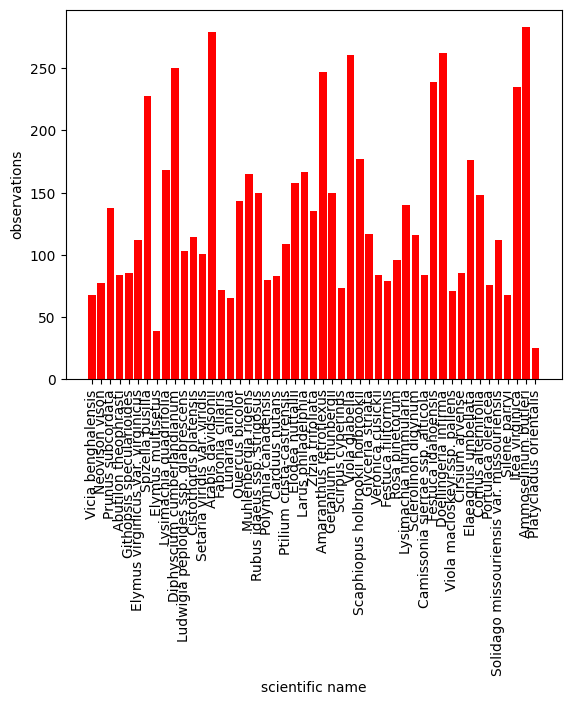

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
names = observations_subset['scientific_name']
appearences = observations_subset['observations']
plt.bar(names,appearences,color='red')
plt.xlabel('scientific name')
plt.ylabel('observations')
plt.xticks(rotation=90)
plt.show()

{'Great Smoky Mountains National Park': 5824, 'Yosemite National Park': 5824, 'Bryce National Park': 5824, 'Yellowstone National Park': 5824}


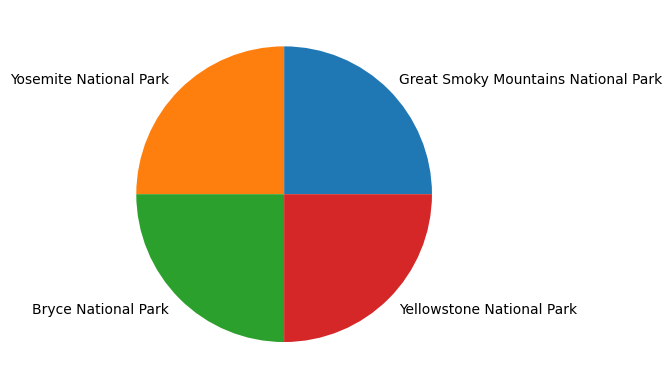

In [5]:
import matplotlib.pyplot as plt
parks = observations['park_name']
my_dict = {}
for x in parks:
    if x in my_dict:
        my_dict[x] += 1
    else:
        my_dict[x] = 1
species_list = list(my_dict.keys())
occurences = list(my_dict.values())
print(my_dict)
plt.pie(occurences, labels=species_list,)
plt.show()

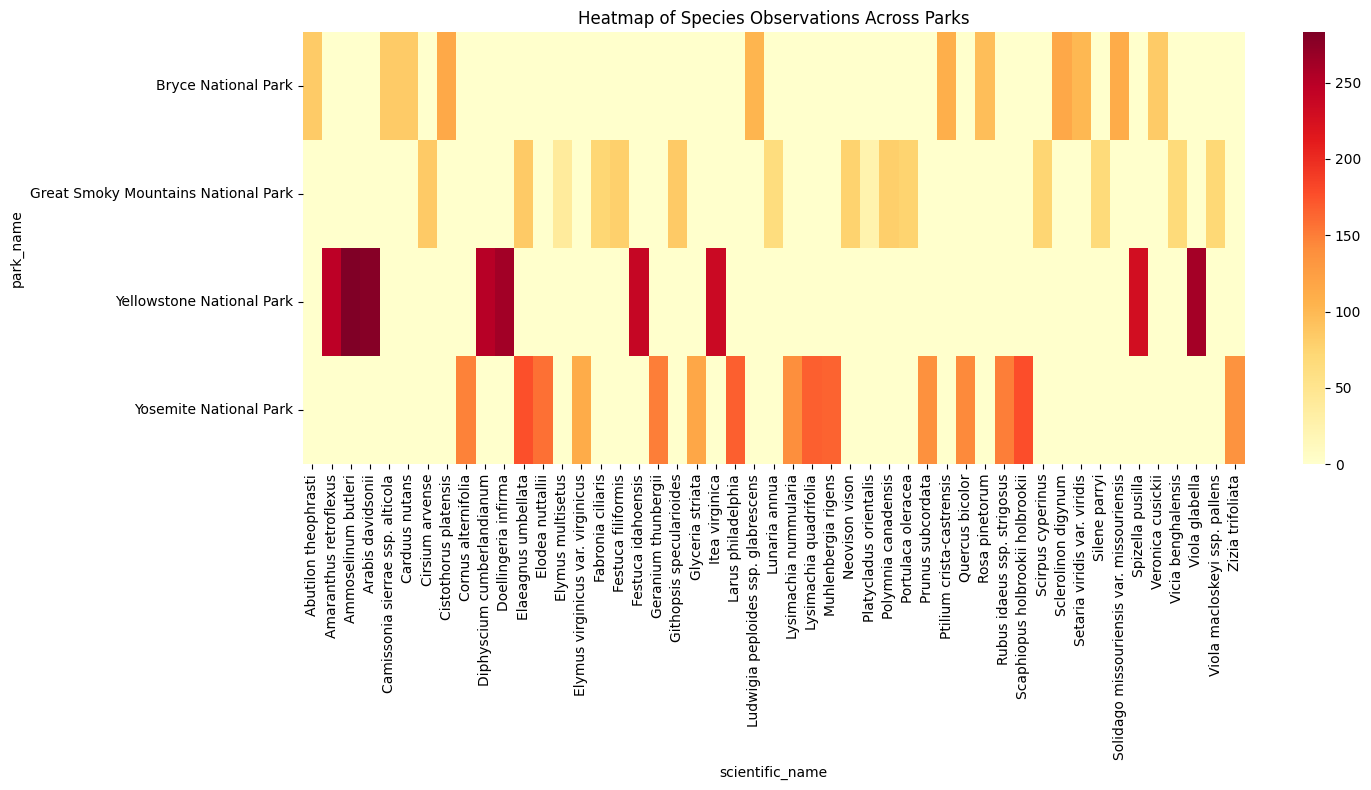

In [15]:
pivot_df = observations_subset.pivot(index='park_name', columns='scientific_name', values='observations').fillna(0)
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_df, cmap='YlOrRd', annot=False)
plt.title('Heatmap of Species Observations Across Parks')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Observations per Species')

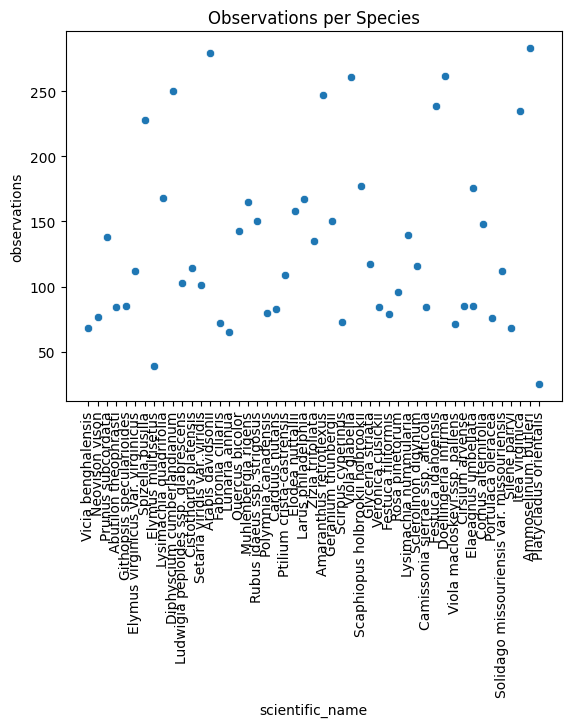

In [14]:
sns.scatterplot(x='scientific_name', y='observations', data=observations_subset)
plt.xticks(rotation=90)
plt.title('Observations per Species')

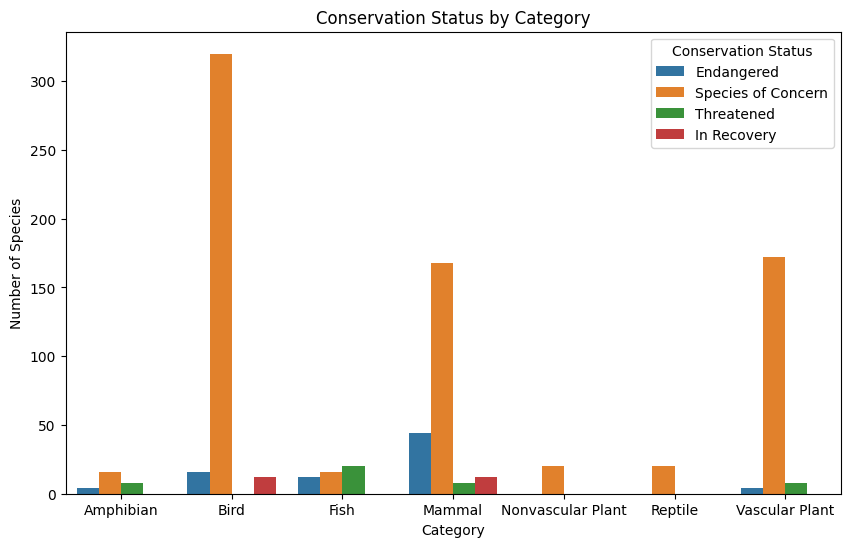

In [17]:
merged_data = pd.merge(observations, species, on='scientific_name')

counts = merged_data.groupby(['category', 'conservation_status']).size()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index.get_level_values(0), y=counts.values, hue=counts.index.get_level_values(1))
plt.title('Conservation Status by Category')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.legend(title='Conservation Status')
plt.show()